# Problem Statement

My target in this exercise is to stop as much fraud as possible (in dollar value). 

Constraints:
1. You must stop as much fraud as possible yet not exceed blocking 15% of genuine transactions. Note: in genuine transactions we care about the number of transactions stopped and not about the dollar value.
2. You can use up to 4 rules (see below what a rule is). 
3. 2 out of the 4 rules must contain at least 2 conditions.

Definition of "rules":
A rule is made of logical conditions, examples of possible conditions are:
1. Amount >= $600
2. IP class B = 256.256
3. Merchant = British Airways
 
A rule can be composed of a few conditions with AND relationship between them. 
For example:
(Amount >= $600) AND (Merchant = British Airways)
This rule will stop all transactions coming from British Airways whose amount is larger or equal to $600.

1. Please prioritize the rules that you create.
2. Please summarize how much fraud your 4 rules can stop (in $ value) and how many genuine transactions they will stop (in % out of all overall transactions)

# Hypothesis

This is one of the important stages in any Data Science/Machine Learning pipeline.

Below are some of the factors which I think can highly affect the target i.e. Fraudulent transaction:

Merchant: Based on the merchant might impact the fradulent transaction. some merchants can have fraudulent txns other may not have

Amount USD: The amount of transaction can decide the transaction is fradulent or not, we can find unusual activities through the amount of transaction.

IP B: IP Network details which can tell alot about fraudster

IP Country: This can tell about country where fraud txns happened through IPs

## Steps to follow

1. Load the Dataset
2. Data processing and cleaning
3. EDA and Data visualization: Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
4. Feature Engineering: creating new columns
5. Find out the rules for fraudulent transactions

To build ML Model to detect fraudulent transaction in future-
1. Model Building: Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
2. Hyperparameter Tuning: Tune the Hyperparameters of the best performing model
3. Model Performance: Assess the Performance of the Model on the Testing data set
4. Save the model: Save the Best Performing Model
5. Predictions: Make Predictions on the Testing data set

In [2]:
#importing libraries required for analysis

# For performing any kind of Mathematical Operations
import numpy as np
# For dealing with DataFrames
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
# For visualizing the plottings better
%matplotlib inline
# For Data Visualization
import seaborn as sns

# LOAD, PREPARE AND CLEAN DATA

we'll use the provied dataset `Exam Excel.xlsx' to load and prepare the data for analysis first

In [3]:
# Read in the data with read_csv() into a Pandas Dataframe
df = pd.read_excel('/Users/sumedhajauhari/Downloads/Exam excel.xlsx',header=0)
df.head(10)

,Time,Merchant,Merchant Country,masked PAN,Amount original,Currency,Amount USD,IP,IP_B,IP country,Fraud OR Genuine
0,20140711 1607,Henny Donovan M,GBR,5434….8967,29,GBP,51,89.213.1.190,89.213,gbr,G
1,20140712 1136,SVP COMMUNICATI,GBR,6759….2613,26,GBP,46,88.96.1.70,88.960,gbr,G
2,20140711 2333,footballcv.com,GBR,4305….5869,40,GBP,71,88.111.36.74,88.111,gbr,G
3,20140710 0934,Ebuyer UK,GBR,4305….5487,2295,GBP,4073,88.110.97.32,88.110,gbr,F
4,20140707 1446,Ladbrokes,GBR,4273….0022,10,GBP,18,88.110.158.69,88.110,gbr,G
5,20140708 2320,Vendita Bigliet,ITA,4263….6751,22,EUR,27,151.82.2.142,151.820,ita,F
6,20140707 1218,Ladbrokes,GBR,4305….8233,5,GBP,9,88.110.158.69,88.110,gbr,G
7,20140709 2058,Dixons Direct,GBR,5454….4917,861,GBP,1528,88.110.237.59,88.110,gbr,G
8,20140708 1517,Pixmania,GBR,5468….3336,675,GBP,1198,88.110.130.146,88.110,gbr,G
9,20140708 1652,girlsshop,GBR,5473….5076,90,GBP,160,88.110.166.27,88.110,gbr,G


In [4]:
#There are spaces in column name should remove it first
df.columns = df.columns.str.replace(' ', '')

#converting Time to proper date time format
df['DateTime']=pd.to_datetime(df['Time'], format='%Y%m%d %H%M%S')
df['DateTime']=df['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df.head(2)

,Time,Merchant,MerchantCountry,maskedPAN,Amountoriginal,Currency,AmountUSD,IP,IP_B,IPcountry,FraudORGenuine,DateTime
0,20140711 1607,Henny Donovan M,GBR,5434….8967,29,GBP,51,89.213.1.190,89.213,gbr,G,2014-07-11 16:00:07
1,20140712 1136,SVP COMMUNICATI,GBR,6759….2613,26,GBP,46,88.96.1.70,88.960,gbr,G,2014-07-12 11:03:06


In [5]:
df.columns

Index(['Time', 'Merchant', 'MerchantCountry', 'maskedPAN', 'Amountoriginal',
       'Currency', 'AmountUSD', 'IP', 'IP_B', 'IPcountry', 'FraudORGenuine',
       'DateTime'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             499 non-null    object 
 1   Merchant         499 non-null    object 
 2   MerchantCountry  499 non-null    object 
 3   maskedPAN        499 non-null    object 
 4   Amountoriginal   499 non-null    object 
 5   Currency         499 non-null    object 
 6   AmountUSD        499 non-null    int64  
 7   IP               499 non-null    object 
 8   IP_B             499 non-null    float64
 9   IPcountry        499 non-null    object 
 10  FraudORGenuine   499 non-null    object 
 11  DateTime         499 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 46.9+ KB


In [7]:
#to print unique values of object datatype
for col in df.columns:
    if df[col].dtype =='object':
        print(col,df[col].unique(),"\n")

Time ['20140711 1607' '20140712 1136' '20140711 2333' '20140710 0934'
 '20140707 1446' '20140708 2320' '20140707 1218' '20140709 2058'
 '20140708 1517' '20140708 1652' '20140710 0445' '20140711 2250'
 '20140710 0626' '20140709 2108' '20140711 2204' '20140709 1548'
 '20140708 1950' '20140710 1443' '20140710 1436' '20140711 1146'
 '20140712 0831' '20140708 1201' '20140709 1717' '20140711 1923'
 '20140709 1751' '20140712 1026' '20140706 2347' '20140709 1530'
 '20140710 2309' '20140706 2302' '20140709 2019' '20140709 1336'
 '20140710 1237' '20140712 124554' '20140711 1429' '20140711 1555'
 '20140710 1042' '20140710 1519' '20140710 1631' '20140712 1140'
 '20140711 1231' '20140712 124009' '20140710 2206' '20140710 1910'
 '20140711 1702' '20140708 1712' '20140709 1906' '20140708 1000'
 '20140709 1202' '20140707 1308' '20140711 2134' '20140709 2247'
 '20140707 1445' '20140708 1718' '20140708 1724' '20140711 1401'
 '20140710 1447' '20140710 2144' '20140710 2149' '20140707 1012'
 '20140709 1825'

In [8]:
for col in df.columns:
    if df[col].dtype in ('int64','float64'):
        print(col,df[col].unique(),"\n")

AmountUSD [  51   46   71 4073   18   27    9 1528 1198  160   12    4 1325   14
   33  231  817  977   11   44 1090   58 1711 3329  835  245 2335  103
   73  113   42   61   76  108   96   65  917  151 1361 1961  126 2662
 1273 3937 2443 2273    3   43  266  121  110 1950   32  222 3558 6771
   24 2929 1986 2262  149 2598 2796  188  550 2308 5773  802    7  335
  153 1486 1116  355  177 1346 4076   86   30   47   23   35 1790   69
 2641  816 3577  775 2562 3476 1424    6 1387  319  949   52   56  280
   20  619  161  302 1576  114  253  528  180   16 2084  372   90   98
  122  719  559   59   67   78  710 2941   21 1027   64  979  214  500
   34 1072  198   63 1721 2258 2129  208  264  248 1022  936   82   19
  105  464 1546 1722  230  885  237  123   45  218  361   40  351  842
  270  878   38 1948  115  195 2664 1597  278 1030   15 2240   89   28
   62  277   37   79  261  786 1905 5485  671 2848 1348  452   75  144
 1466  316 1656  203  257   68  947 2849 1329  410  765  660  350 4

In [9]:
#There is a garbage value in Amountoriginal which needs to be replaced with int value in order to convert it into int data type. 
#I replaced with 263 because I checked there is one more record with KRW currency and it's equivalent Amountoriginal and replacing with same value
df['Amountoriginal']= df['Amountoriginal'].replace('#######','263')
#df[df['Currency']. isin(['KRW','MYR'])]

In [10]:
df["DateTime"]=pd.to_datetime(df["DateTime"]) 
df["Amountoriginal"]=df["Amountoriginal"].astype(int)
df["IPcountry"]= df["IPcountry"].str.upper()
df.info()
print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             499 non-null    object        
 1   Merchant         499 non-null    object        
 2   MerchantCountry  499 non-null    object        
 3   maskedPAN        499 non-null    object        
 4   Amountoriginal   499 non-null    int64         
 5   Currency         499 non-null    object        
 6   AmountUSD        499 non-null    int64         
 7   IP               499 non-null    object        
 8   IP_B             499 non-null    float64       
 9   IPcountry        499 non-null    object        
 10  FraudORGenuine   499 non-null    object        
 11  DateTime         499 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 46.9+ KB
            Time         Merchant MerchantCountry   maskedPAN  Amountor

In [11]:
#We willl always use AmountUSD column instead of Amountoriginal as we are interested in USD value
#converting FraudORGenuine values from F and G to 1 and 0 and creatingg new column FraudORGenuine_Flag

df['FraudORGenuine_Flag']=df['FraudORGenuine'].map({'G':0,'F':1})
display(df.head(2))

,Time,Merchant,MerchantCountry,maskedPAN,Amountoriginal,Currency,AmountUSD,IP,IP_B,IPcountry,FraudORGenuine,DateTime,FraudORGenuine_Flag
0,20140711 1607,Henny Donovan M,GBR,5434….8967,29,GBP,51,89.213.1.190,89.213,GBR,G,2014-07-11 16:00:07,0
1,20140712 1136,SVP COMMUNICATI,GBR,6759….2613,26,GBP,46,88.96.1.70,88.960,GBR,G,2014-07-12 11:03:06,0


In [12]:
df['FraudORGenuine_Flag'].value_counts()
df['FraudORGenuine_Flag']=df['FraudORGenuine_Flag'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 499 non-null    object        
 1   Merchant             499 non-null    object        
 2   MerchantCountry      499 non-null    object        
 3   maskedPAN            499 non-null    object        
 4   Amountoriginal       499 non-null    int64         
 5   Currency             499 non-null    object        
 6   AmountUSD            499 non-null    int64         
 7   IP                   499 non-null    object        
 8   IP_B                 499 non-null    float64       
 9   IPcountry            499 non-null    object        
 10  FraudORGenuine       499 non-null    object        
 11  DateTime             499 non-null    datetime64[ns]
 12  FraudORGenuine_Flag  499 non-null    int64         
dtypes: datetime64[ns](1), float64(1), i

In [13]:
#Total we have 4999 records and 12 columns
df.shape

(499, 13)

In [14]:
#there are 68 records where MerchantCountry is not same as IPcountry and txn is fraud 
# 54 records where MerchantCountry is same as IPcountry and txn is Genuine
#df[(df['MerchantCountry'] != df['IPcountry']) & (df['FraudORGenuine_Flag'] == 0)].shape[0]

In [15]:
df.describe(include='all')

,Time,Merchant,MerchantCountry,maskedPAN,Amountoriginal,Currency,AmountUSD,IP,IP_B,IPcountry,FraudORGenuine,DateTime,FraudORGenuine_Flag
count,499,499,499,499,499.000000,499,499.000000,499,499.000000,499,499,499,499.000000
unique,475,214,28,407,NaN,13,NaN,402,NaN,29,2,475,NaN
top,20140712 1000,Ebuyer UK,GBR,5434….9007,NaN,GBP,NaN,82.104.56.193,NaN,GBR,G,2014-07-12 10:00:00,NaN
freq,3,37,342,11,NaN,378,NaN,10,NaN,365,280,3,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-06 21:02:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-12 12:52:22,NaN
mean,NaN,NaN,NaN,NaN,514.623246,NaN,736.138277,NaN,120.718026,NaN,NaN,NaN,0.438878
std,NaN,NaN,NaN,NaN,1041.266167,NaN,1051.258161,NaN,54.652574,NaN,NaN,NaN,0.496748
min,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,NaN,24.210000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,51.000000,NaN,73.000000,NaN,82.104000,NaN,NaN,NaN,0.000000


In [16]:
#one problem can be seen in columns IP and IP_B. After loading it from excel pythoon identified IP_B as float 
#and converted value like 88.96.1.70 to 88.960 which is incorrect. we will create a new column IP_B_New taking only first two parts of IP

df['IP_new'] = df['IP'].str.split('.').str[0] + '.' + df['IP'].str.split('.').str[1]
df['IP_new']=df['IP_new'].astype(object)
df.head(5)

,Time,Merchant,MerchantCountry,maskedPAN,Amountoriginal,Currency,AmountUSD,IP,IP_B,IPcountry,FraudORGenuine,DateTime,FraudORGenuine_Flag,IP_new
0,20140711 1607,Henny Donovan M,GBR,5434….8967,29,GBP,51,89.213.1.190,89.213,GBR,G,2014-07-11 16:00:07,0,89.213
1,20140712 1136,SVP COMMUNICATI,GBR,6759….2613,26,GBP,46,88.96.1.70,88.960,GBR,G,2014-07-12 11:03:06,0,88.96
2,20140711 2333,footballcv.com,GBR,4305….5869,40,GBP,71,88.111.36.74,88.111,GBR,G,2014-07-11 23:03:03,0,88.111
3,20140710 0934,Ebuyer UK,GBR,4305….5487,2295,GBP,4073,88.110.97.32,88.110,GBR,F,2014-07-10 09:03:04,1,88.110
4,20140707 1446,Ladbrokes,GBR,4273….0022,10,GBP,18,88.110.158.69,88.110,GBR,G,2014-07-07 14:04:06,0,88.110


In [17]:
#creating few new columns from DateTime to decipher more information about fraud
df["Date_new"]= df["DateTime"].dt.date
df["Time_new"]= df["DateTime"].dt.time
df["day_name"]=df['DateTime'].dt.day_name()
df["hour_new"]=df['DateTime'].dt.hour
df.head(5)

,Time,Merchant,MerchantCountry,maskedPAN,Amountoriginal,Currency,AmountUSD,IP,IP_B,IPcountry,FraudORGenuine,DateTime,FraudORGenuine_Flag,IP_new,Date_new,Time_new,day_name,hour_new
0,20140711 1607,Henny Donovan M,GBR,5434….8967,29,GBP,51,89.213.1.190,89.213,GBR,G,2014-07-11 16:00:07,0,89.213,2014-07-11,16:00:07,Friday,16
1,20140712 1136,SVP COMMUNICATI,GBR,6759….2613,26,GBP,46,88.96.1.70,88.960,GBR,G,2014-07-12 11:03:06,0,88.96,2014-07-12,11:03:06,Saturday,11
2,20140711 2333,footballcv.com,GBR,4305….5869,40,GBP,71,88.111.36.74,88.111,GBR,G,2014-07-11 23:03:03,0,88.111,2014-07-11,23:03:03,Friday,23
3,20140710 0934,Ebuyer UK,GBR,4305….5487,2295,GBP,4073,88.110.97.32,88.110,GBR,F,2014-07-10 09:03:04,1,88.110,2014-07-10,09:03:04,Thursday,9
4,20140707 1446,Ladbrokes,GBR,4273….0022,10,GBP,18,88.110.158.69,88.110,GBR,G,2014-07-07 14:04:06,0,88.110,2014-07-07,14:04:06,Monday,14


<Axes: >

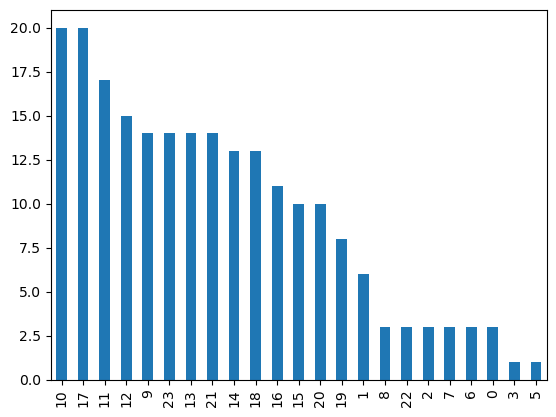

In [18]:
#df["hour_new"].value_counts()
df[df['FraudORGenuine_Flag'] == 1]['hour_new'].value_counts().plot(kind='bar')
#df[(df['MerchantCountry'] != df['IPcountry']) & (df['FraudORGenuine_Flag'] == 1)].shape[0]

In [19]:
#check any null values
df.isnull().sum()

Time                   0
Merchant               0
MerchantCountry        0
maskedPAN              0
Amountoriginal         0
Currency               0
AmountUSD              0
IP                     0
IP_B                   0
IPcountry              0
FraudORGenuine         0
DateTime               0
FraudORGenuine_Flag    0
IP_new                 0
Date_new               0
Time_new               0
day_name               0
hour_new               0
dtype: int64

In [20]:
#Data consists of 7 days txns in July 2014
df["Date_new"].value_counts().sort_index()

2014-07-06     12
2014-07-07     67
2014-07-08     49
2014-07-09     63
2014-07-10    130
2014-07-11    127
2014-07-12     51
Name: Date_new, dtype: int64

In [21]:
#I will create a new dataframe with only relevant columns required for analysis

columns_of_interest = ['DateTime','Merchant', 'MerchantCountry', 'Currency', 'AmountUSD','IP_new','IPcountry', 'FraudORGenuine_Flag','Date_new','Time_new','day_name','hour_new']
df_new= df[columns_of_interest].copy()
display(df_new)

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name,hour_new
0,2014-07-11 16:00:07,Henny Donovan M,GBR,GBP,51,89.213,GBR,0,2014-07-11,16:00:07,Friday,16
1,2014-07-12 11:03:06,SVP COMMUNICATI,GBR,GBP,46,88.96,GBR,0,2014-07-12,11:03:06,Saturday,11
2,2014-07-11 23:03:03,footballcv.com,GBR,GBP,71,88.111,GBR,0,2014-07-11,23:03:03,Friday,23
3,2014-07-10 09:03:04,Ebuyer UK,GBR,GBP,4073,88.110,GBR,1,2014-07-10,09:03:04,Thursday,9
4,2014-07-07 14:04:06,Ladbrokes,GBR,GBP,18,88.110,GBR,0,2014-07-07,14:04:06,Monday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
494,2014-07-10 12:00:02,Ebuyer UK,GBR,GBP,3458,131.227,GBR,1,2014-07-10,12:00:02,Thursday,12
495,2014-07-08 16:00:02,Bollettino On-L,ITA,EUR,501,88.48,ITA,1,2014-07-08,16:00:02,Tuesday,16
496,2014-07-08 16:00:01,Bollettino On-L,ITA,EUR,501,88.48,ITA,1,2014-07-08,16:00:01,Tuesday,16
497,2014-07-11 09:03:06,John Lewis Live,FIN,GBP,1150,131.111,GBR,0,2014-07-11,09:03:06,Friday,9


In [22]:
#check whether data is balanced or not

df_new['FraudORGenuine_Flag'].value_counts()

0    280
1    219
Name: FraudORGenuine_Flag, dtype: int64

In [23]:
# % of fraud txns
100*(219/499)

43.8877755511022

In [24]:
#As said in problem statement 15% of genuine transactions should not be blocked i.e. not more than 42 genuine txns should be blocked

(15/100)*280

42.0

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             499 non-null    datetime64[ns]
 1   Merchant             499 non-null    object        
 2   MerchantCountry      499 non-null    object        
 3   Currency             499 non-null    object        
 4   AmountUSD            499 non-null    int64         
 5   IP_new               499 non-null    object        
 6   IPcountry            499 non-null    object        
 7   FraudORGenuine_Flag  499 non-null    int64         
 8   Date_new             499 non-null    object        
 9   Time_new             499 non-null    object        
 10  day_name             499 non-null    object        
 11  hour_new             499 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 46.9+ KB


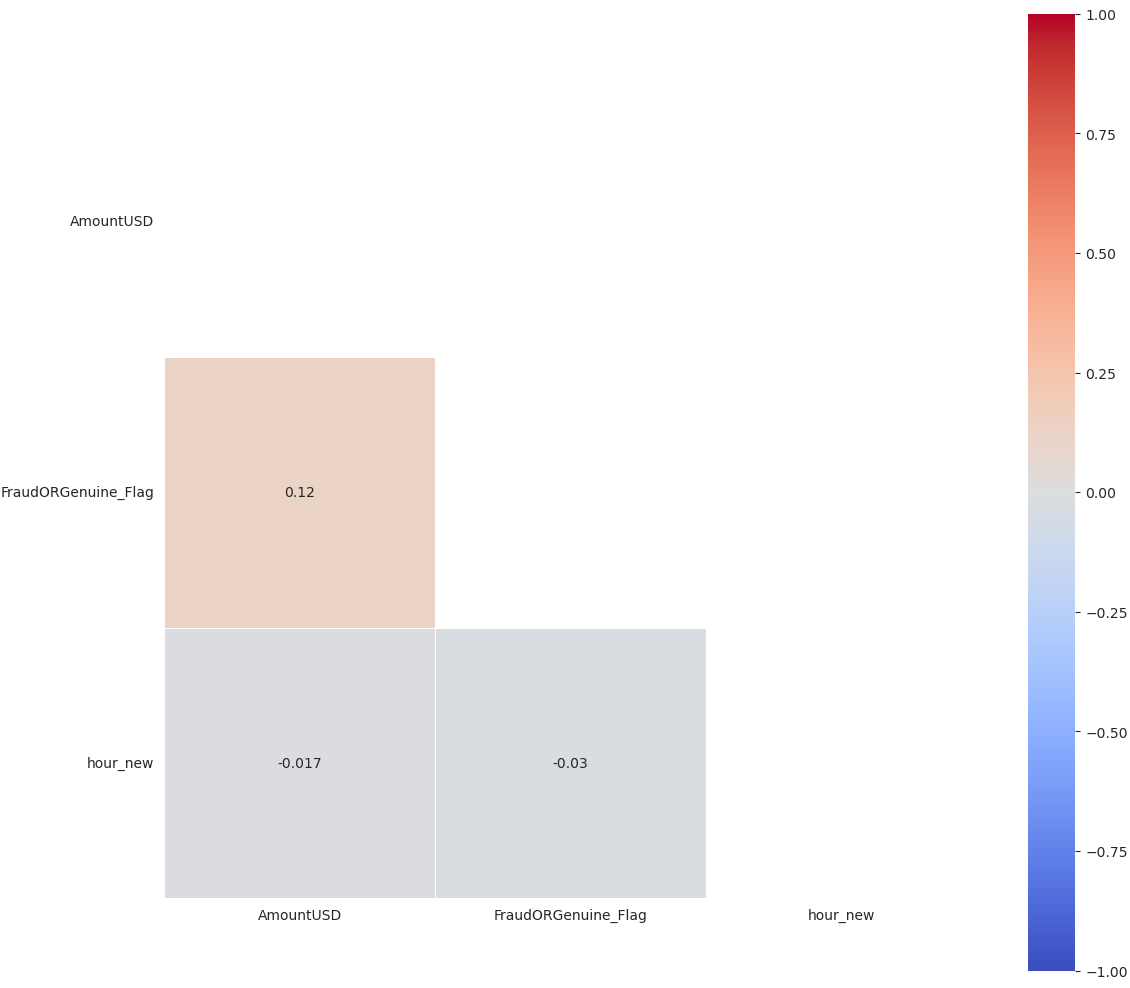

In [26]:
#43.8% txns are fraud and remaining 56.2% are genuine txns that means data is balanced

#checking forr correlation

SP_corr = df_new.corr(numeric_only=True)
mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

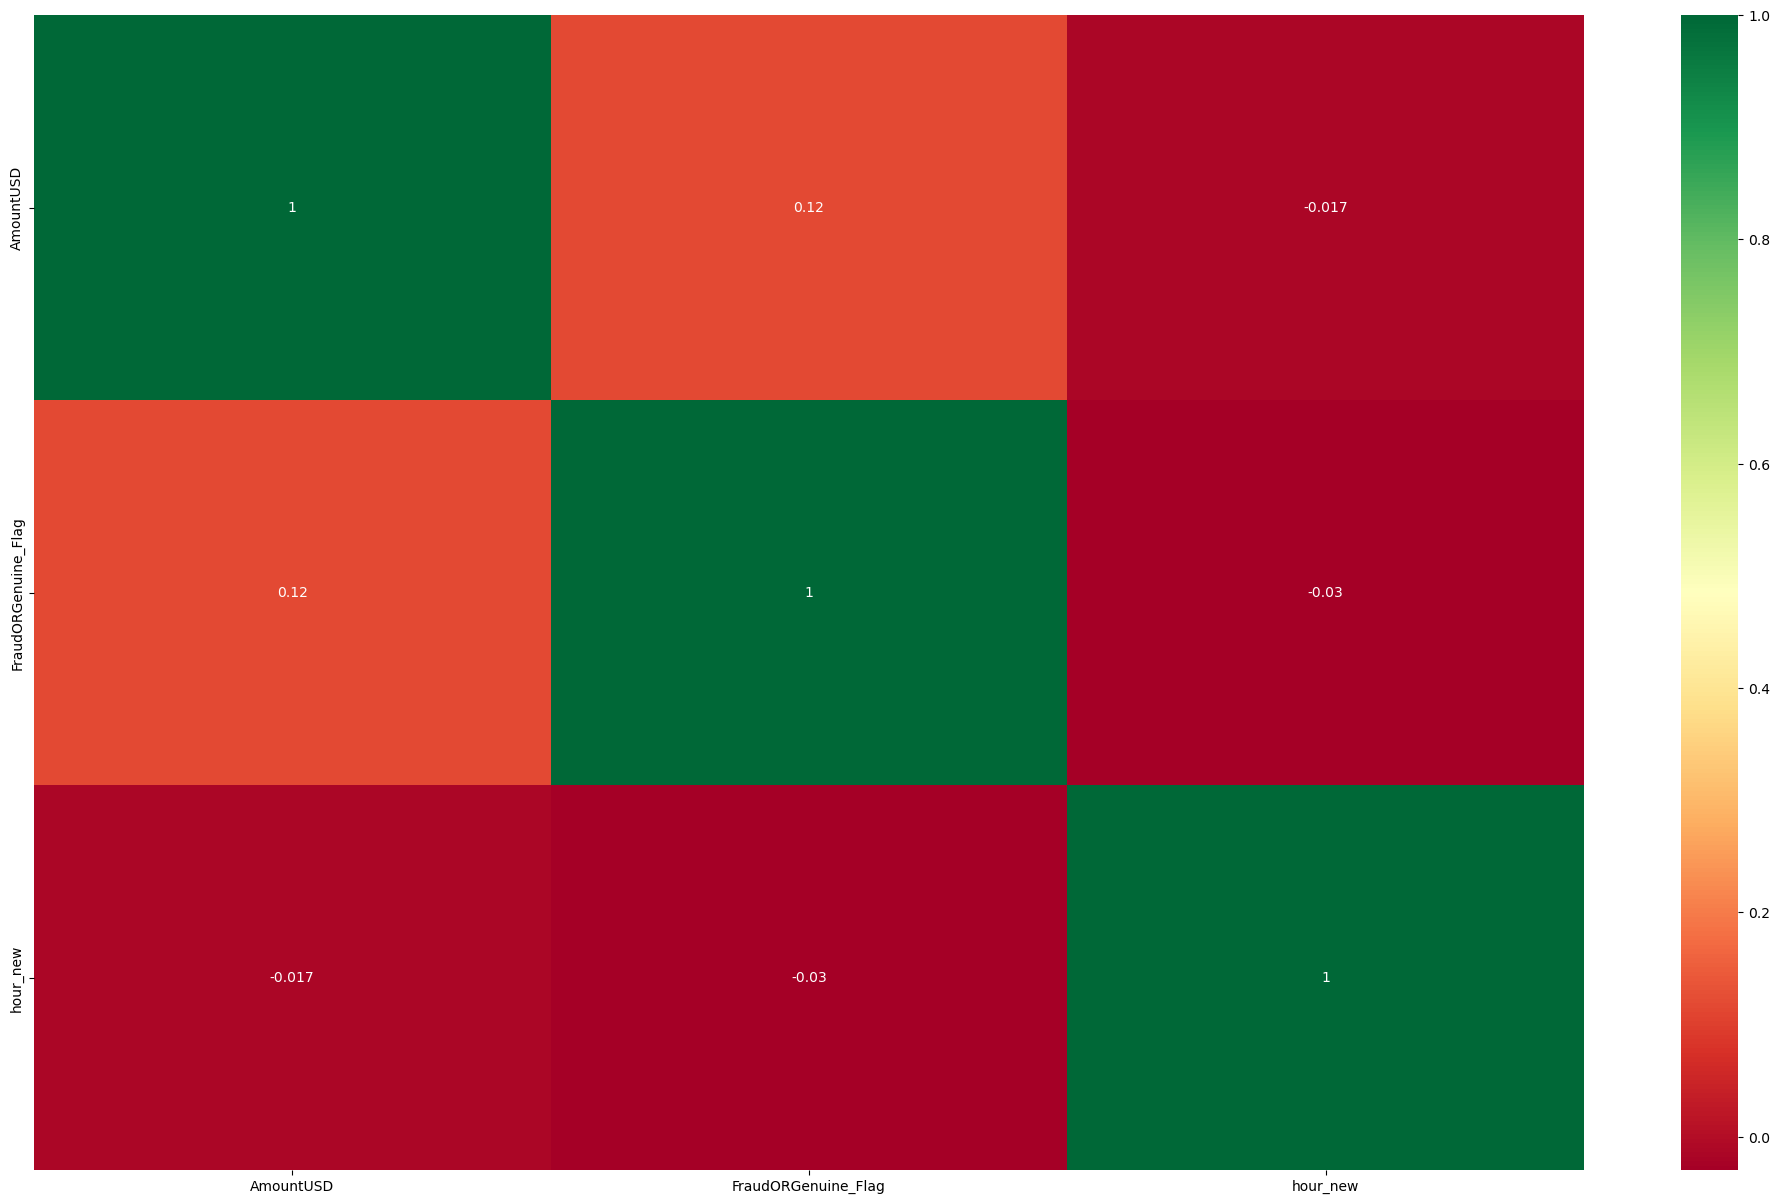

In [27]:
corr = df_new.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

we will remove hour_new from df_new as it is highly negatively correlated with FraudOR Genuine_Flag

In [28]:
df_new=df_new.drop(['hour_new'],axis=1) 

## Data Visualization and Exploratory Data Analysis (EDA)

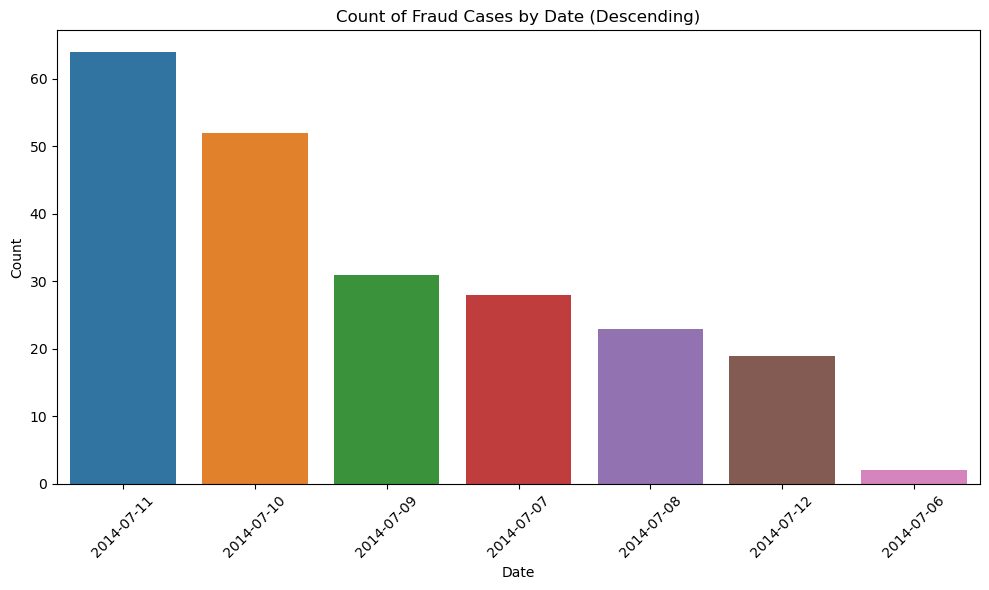

In [138]:
df_fraud=df_new[df_new['FraudORGenuine_Flag'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(x='Date_new',data=df_fraud, order=df_fraud['Date_new'].value_counts().sort_values(ascending=False).index)
plt.title('Count of Fraud Cases by Date (Descending)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

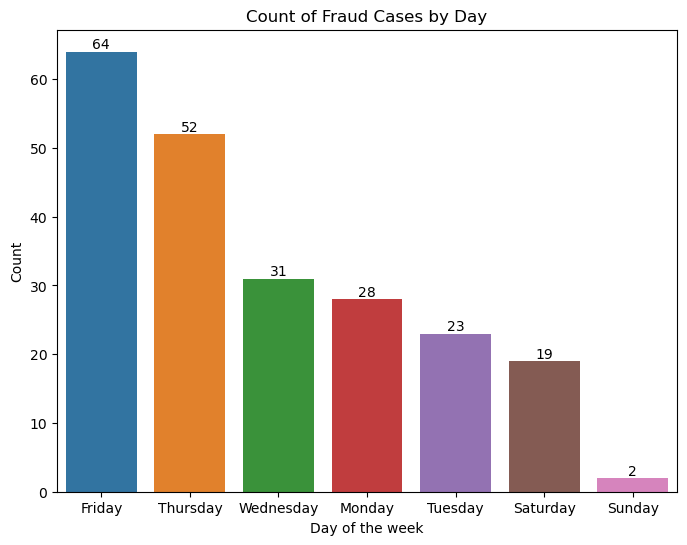

In [162]:
df_fraud = df_new[df_new['FraudORGenuine_Flag'] == 1]


plt.figure(figsize=(8,6))
ax=sns.countplot(x='day_name', data=df_fraud, order=df_fraud['day_name'].value_counts().sort_values(ascending=False).index)
plt.title('Count of Fraud Cases by Day')
plt.xlabel('Day of the week')
plt.ylabel('Count')
# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

Friday had most number of frauds folllowed by Thursday and Wednesday and most frauds happened on 11th and 10th July

In [140]:
fraud_merchants= df_new[df_new['FraudORGenuine_Flag'] == 1].groupby('Merchant')['AmountUSD'].sum().reset_index()
fraud_merchants.sort_values(by='AmountUSD', ascending=False)[:15]

,Merchant,AmountUSD
28,Ebuyer UK,44914
90,Watford Electro,9860
48,Last Minute,9369
97,ecomet,8663
45,KOMPLETT.CO.UK,7306
21,Dabs.com,7075
46,Kitbag,6445
69,Simply Computers,5773
12,British Airways,4739
44,John Lewis Live,4102


Ebuyer UK had fraud costing to highest amount 44,914 USD. We can block this merchant and add it in rules but we also need to check how many genuine txns happening from this merchant

In [172]:
#drilling down further on merchant Ebuyer UK

df_filter=df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 1)]
#fraud_counts_by_date = df_filter['Date_new'].value_counts()
fraud_counts_by_date=df_filter.groupby('Date_new').agg({'AmountUSD': 'sum', 'Merchant': 'count'})
fraud_counts_by_date = fraud_counts_by_date.rename(columns={'Merchant': 'TransactionCount'})

print("Fraud Transactions by Date and Amount:")
print(fraud_counts_by_date)

Fraud Transactions by Date and Amount:
            AmountUSD  TransactionCount
Date_new                               
2014-07-07       8502                 3
2014-07-10      22060                 9
2014-07-11       9122                 4
2014-07-12       5230                 3


In [182]:
df_new['Date_new']=df_new['Date_new'].astype(str)
df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 1) & (df_new['Date_new'] == '2014-07-10')]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
3,2014-07-10 09:03:04,Ebuyer UK,GBR,GBP,4073,88.110,GBR,1,2014-07-10,09:03:04,Thursday
69,2014-07-10 14:04:05,Ebuyer UK,GBR,GBP,2929,86.138,GBR,1,2014-07-10,14:04:05,Thursday
105,2014-07-10 13:02:08,Ebuyer UK,GBR,GBP,816,84.9,GBR,1,2014-07-10,13:02:08,Thursday
210,2014-07-10 17:03:00,Ebuyer UK,GBR,GBP,1030,81.158,GBR,1,2014-07-10,17:03:00,Thursday
363,2014-07-10 09:05:07,Ebuyer UK,GBR,GBP,1935,213.131,GBR,1,2014-07-10,09:05:07,Thursday
381,2014-07-10 13:05:08,Ebuyer UK,GBR,GBP,1958,207.195,USA,1,2014-07-10,13:05:08,Thursday
414,2014-07-10 09:05:06,Ebuyer UK,GBR,GBP,3458,172.216,GBR,1,2014-07-10,09:05:06,Thursday
420,2014-07-10 13:02:01,Ebuyer UK,GBR,GBP,2403,172.214,GBR,1,2014-07-10,13:02:01,Thursday
494,2014-07-10 12:00:02,Ebuyer UK,GBR,GBP,3458,131.227,GBR,1,2014-07-10,12:00:02,Thursday


Ebuyer UK had 19 fraud txns in 4 days. 10th July was highest 22k USD.
IP 84.9 can be added in rule since it is resulting in 13 fraud txns as can be seen below amounting to 20928 USD

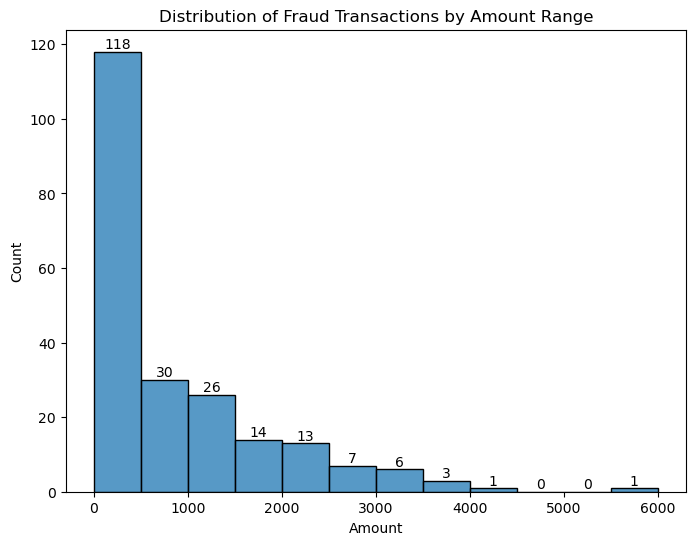

In [161]:
df_fraud = df_new[df_new['FraudORGenuine_Flag'] == 1]

# Define bins for amount ranges
bins = [0, 10000, 20000, 30000]
# Create histplot using Seaborn
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=df_fraud, x='AmountUSD', bins=bins, binwidth=500)
plt.title('Distribution of Fraud Transactions by Amount Range')
plt.xlabel('Amount')
plt.ylabel('Count')
# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

Maximum fraud txns happened for amount ranging between 0-500 and min fraud amount is 2 and max is 5773

In [163]:
df_fraud = df_new[df_new['FraudORGenuine_Flag'] == 1]

min_amount = df_fraud['AmountUSD'].min()
max_amount = df_fraud['AmountUSD'].max()
print(min_amount)
print(max_amount)

2
5773


In [213]:
df_new[(df_new['FraudORGenuine_Flag'] == 1) & (df_new['AmountUSD'] == 5773)]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
78,2014-07-12 12:52:22,Simply Computers,GBR,GBP,5773,86.135,IRL,1,2014-07-12,12:52:22,Saturday


In [214]:
df_new[(df_new['FraudORGenuine_Flag'] == 1) & (df_new['Merchant'] == 'Simply Computers')]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
78,2014-07-12 12:52:22,Simply Computers,GBR,GBP,5773,86.135,IRL,1,2014-07-12,12:52:22,Saturday


We can put a rule to block Merchant Simply Computers as there is only txn happened and that too fraudulent

In [215]:
df_new[(df_new['FraudORGenuine_Flag'] == 1) & (df_new['AmountUSD'] > 3500)]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
3,2014-07-10 09:03:04,Ebuyer UK,GBR,GBP,4073,88.110,GBR,1,2014-07-10,09:03:04,Thursday
53,2014-07-07 14:04:05,Opodo Ltd,GBR,GBP,3937,86.144,GBR,1,2014-07-07,14:04:05,Monday
78,2014-07-12 12:52:22,Simply Computers,GBR,GBP,5773,86.135,IRL,1,2014-07-12,12:52:22,Saturday
106,2014-07-10 17:00:03,Currys Direct,GBR,GBP,3577,84.9,GBR,1,2014-07-10,17:00:03,Thursday
260,2014-07-07 12:01:05,Ebuyer UK,GBR,GBP,3528,80.41,GBR,1,2014-07-07,12:01:05,Monday


In [217]:
df_new[(df_new['FraudORGenuine_Flag'] == 0) & (df_new['AmountUSD'] > 4000)]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
66,2014-07-10 20:03:05,British Airways,GBR,GBP,6771,86.139,GBR,0,2014-07-10,20:03:05,Thursday
94,2014-07-08 20:04:09,Watford Electro,GBR,GBP,4076,86.129,GBR,0,2014-07-08,20:04:09,Tuesday
230,2014-07-07 10:02:08,John Lewis Live,FIN,GBP,5485,81.144,GBR,0,2014-07-07,10:02:08,Monday
256,2014-07-07 15:01:06,British Airways,GBR,GBP,4377,80.42,GBR,0,2014-07-07,15:01:06,Monday
273,2014-07-11 15:02:00,Ebuyer UK,GBR,GBP,4211,80.176,GBR,0,2014-07-11,15:02:00,Friday
332,2014-07-11 09:03:09,IBE Emirates,ARE,GBP,6818,217.169,GBR,0,2014-07-11,09:03:09,Friday
482,2014-07-11 11:02:01,Dixons Direct,GBR,GBP,4677,172.141,GBR,0,2014-07-11,11:02:01,Friday


In [222]:
df_new[(df_new['FraudORGenuine_Flag'] == 0) & (df_new['Merchant'] == 'Currys Direct')]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
155,2014-07-10 22:01:04,Currys Direct,GBR,GBP,979,82.41,GBR,0,2014-07-10,22:01:04,Thursday


In [196]:
df_fraud = df_new[df_new['FraudORGenuine_Flag'] == 1]


IP_address_count = df_fraud['IP_new'].value_counts()
IP_amount_sum = df_fraud.groupby('IP_new')['AmountUSD'].sum()
IP_summary = pd.DataFrame({'Transaction Count': IP_address_count, 'Total Amount': IP_amount_sum})
IP_summary_sorted = IP_summary.sort_values(by='Total Amount', ascending=False)
styled_df = IP_summary_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

display(styled_df)

,Transaction Count,Total Amount
84.9,13,20928
86.138,4,10106
86.135,4,9433
80.41,5,8854
172.216,3,6775
172.201,5,6378
172.214,2,5902
81.157,2,5379
172.188,5,4883
207.195,2,4384


Most fraud txns are happening from IP 84.9, 82.104 in terms of number of txns. 
13 fraud txns from IP 84.9 amounting 20928 USD, IP 86.138 amounting 10106 USD. If we stop these txns we can save fraud as much as possible 

In [229]:
filtered_df=df_new[(df_new['IP_new']. isin(['84.9','86.138','86.135','80.41','172.216','172.201','172.214','81.157'])) & (df_new['FraudORGenuine_Flag'] == 1)].shape[0]
print(filtered_df)
#amount_sum = filtered_df['AmountUSD'].sum()
#print(amount_sum)

38


In [200]:
# we can also check how many genuine transactions happened from above IPs

df_new[(df_new['IP_new']. isin(['84.9','86.138','86.135','80.41','172.216','172.201','172.214','81.157'])) & (df_new['FraudORGenuine_Flag'] == 0)]

,DateTime,Merchant,MerchantCountry,Currency,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Date_new,Time_new,day_name
44,2014-07-10 19:01:00,SeaFrance Limit,FRA,GBP,151,172.201,GBR,0,2014-07-10,19:01:00,Thursday
72,2014-07-10 22:01:09,bmi Airways Ltd,GBR,GBP,149,86.138,GBR,0,2014-07-10,22:01:09,Thursday
73,2014-07-11 15:02:09,Hughes Electric,GBR,GBP,2598,86.138,GBR,0,2014-07-11,15:02:09,Friday
74,2014-07-06 21:03:05,Purelygadgets,GBR,GBP,2796,86.138,GBR,0,2014-07-06,21:03:05,Sunday
81,2014-07-11 08:05:08,HM Land Registr,GBR,GBP,4,86.135,GBR,0,2014-07-11,08:05:08,Friday
82,2014-07-11 09:01:01,HM Land Registr,GBR,GBP,7,86.135,GBR,0,2014-07-11,09:01:01,Friday
214,2014-07-10 14:01:08,Handtech.co.uk,GBR,GBP,105,81.157,GBR,0,2014-07-10,14:01:08,Thursday
215,2014-07-08 17:03:09,Dominos Pizza,GBR,GBP,44,81.157,GBR,0,2014-07-08,17:03:09,Tuesday
416,2014-07-10 20:00:03,DIRIN,GBR,GBP,444,172.216,GBR,0,2014-07-10,20:00:03,Thursday
422,2014-07-11 19:02:08,Ebuyer UK,GBR,GBP,331,172.214,GBR,0,2014-07-11,19:02:08,Friday


In [48]:
# Group by IP and check for fraud txns only and 0 genuine transaction

grouped = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    amount_sum=('AmountUSD', 'sum')
)

# Filter for IPs with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_data = grouped[(grouped['fraud_count'] > 0) & (grouped['genuine_count'] == 0)]
fraud_only_data_sorted=fraud_only_data.sort_values(by='amount_sum', ascending=False)
styled_df = fraud_only_data_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("IP addresses with only fraudulent transactions and their total Amount USD:")
display(styled_df)

IP addresses with only fraudulent transactions and their total Amount USD:


,fraud_count,genuine_count,amount_sum
IP_new,,,
84.9,13,0,20928
80.41,5,0,8854
207.195,2,0,4384
80.56,2,0,4178
82.163,2,0,3957
131.227,1,0,3458
81.132,1,0,2848
86.133,2,0,2602
172.209,3,0,2518


In [49]:
# Group by IP and check for fraud as well as genuine transaction counts

grouped = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    amount_sum=('AmountUSD', 'sum')
)

# Filter for IPs with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_data = grouped[(grouped['fraud_count'] > 0) & (grouped['genuine_count'] > 0)]
fraud_only_data_sorted=fraud_only_data.sort_values(by='amount_sum', ascending=False)
styled_df = fraud_only_data_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("IP addresses with only fraudulent transactions and their total Amount USD:")
display(styled_df)

IP addresses with only fraudulent transactions and their total Amount USD:


,fraud_count,genuine_count,amount_sum
IP_new,,,
86.138,4,3,15649
86.135,4,2,9444
87.74,7,6,9201
86.144,1,2,8653
172.216,3,1,7219
88.110,1,5,6986
172.201,5,3,6699
172.214,2,2,6316
172.141,1,5,5880


In [52]:
# Group by IP and check for fraud and genuine transaction counts
grouped_ip = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum())
)

# Filter for IPs with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_data = grouped_ip[(grouped_ip['fraud_count'] > 0) & (grouped_ip['genuine_count'] == 0)]
fraud_only_ips = fraud_only_data.index.tolist()

# Filter the main dataframe for transactions from these IPs
fraud_only_transactions = df_new[df_new['IP_new'].isin(fraud_only_ips)]

# Group by IP and IP country to get the count of transactions
fraud_only_ip_countries = fraud_only_transactions.groupby(['IPcountry']).size().reset_index(name='count')
fraud_only_ip_countries_sorted=fraud_only_ip_countries.sort_values(by='count', ascending=False)
styled_df = fraud_only_ip_countries_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("List of IPs with only fraudulent transactions, their IP countries, and the count of transactions:")
display(styled_df)

List of IPs with only fraudulent transactions, their IP countries, and the count of transactions:


,IPcountry,count
8,GBR,50
10,ITA,34
13,NGA,14
14,NLD,7
5,ESP,6
19,USA,4
6,FIN,3
9,GHA,3
2,CAN,3
15,POL,3


In [54]:
# doing reverse finding merchants first and then excluding tjeir IPs
#Filter for merchants with only fraudulent transactions and IP not in fraud_only_ips

# Group by Merchant and check for fraud and genuine transaction counts
grouped_merchant = df_new.groupby('Merchant').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount=('AmountUSD', 'sum')
)

# Filter for merchants with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & (grouped_merchant['genuine_count'] == 0)]

# Sort by total_amount in descending order
fraud_only_merchants_sorted = fraud_only_merchants.sort_values(by='total_amount', ascending=False)
styled_df = fraud_only_merchants_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("List of merchants with only fraudulent transactions, sorted by total amount in descending order:")
display(styled_df)

# Filter for merchants with only fraudulent transactions and IP not in fraud_only_ips
"""fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & 
                                        (grouped_merchant['genuine_count'] == 0) &
                                        #(grouped_merchant['amount_sum']) &
                                        (~grouped_merchant['ips'].apply(lambda x: any(ip in fraud_only_ips for ip in x)))] """

#print("Merchants with only fraudulent transactions and their IPs are not in the fraud-only IPs list:")
#display(fraud_only_merchants) 

List of merchants with only fraudulent transactions, sorted by total amount in descending order:


,fraud_count,genuine_count,total_amount
Merchant,,,
KOMPLETT.CO.UK,6,0,7306
Digibao.fr,2,0,3965
Yoox spa,1,0,3139
Cdiscount,2,0,2731
Sony Style Euro,1,0,2426
TUNISAIR Int.,1,0,2343
Bollettino On-L,5,0,2337
Overclockers UK,1,0,2308
PC World Direct,1,0,2129


"fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & \n                                        (grouped_merchant['genuine_count'] == 0) &\n                                        #(grouped_merchant['amount_sum']) &\n                                        (~grouped_merchant['ips'].apply(lambda x: any(ip in fraud_only_ips for ip in x)))] "

In [55]:
#excluding IPs

# Group by Merchant and check for fraud and genuine transaction counts
grouped_merchant = df_new.groupby('Merchant').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount=('AmountUSD', 'sum')
)

# Filter for merchants with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & (grouped_merchant['genuine_count'] == 0)]

# Get list of fraud-only merchants
fraud_only_merchants_list = fraud_only_merchants.index.tolist()

# Filter the data to exclude transactions from fraud-only merchants
filtered_df = df[~df['Merchant'].isin(fraud_only_merchants_list)]

# Group by IP_new and check for fraud and genuine transaction counts
grouped_ip = filtered_df.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount=('AmountUSD', 'sum'),
    IP_country=('IPcountry', 'first')  # assuming IPcountry is consistent for each IP
)

# Filter for IPs with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_ips = grouped_ip[(grouped_ip['fraud_count'] > 0) & (grouped_ip['genuine_count'] == 0)]

# Sort by total_amount in descending order
fraud_only_ips_sorted = fraud_only_ips.sort_values(by='total_amount', ascending=False)

print("List of IPs with only fraudulent transactions (excluding fraud-only merchants), sorted by total amount in descending order:")
styled_df = fraud_only_ips_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')
display(styled_df)

List of IPs with only fraudulent transactions (excluding fraud-only merchants), sorted by total amount in descending order:


,fraud_count,genuine_count,total_amount,IP_country
IP_new,,,,
84.9,12,0,19979,GBR
80.41,4,0,8534,GBR
131.227,1,0,3458,GBR
80.56,1,0,2849,NLD
81.132,1,0,2848,GBR
86.133,2,0,2602,GBR
172.209,2,0,2182,GBR
207.195,1,0,1958,USA
213.131,1,0,1935,GBR


In [58]:
#this doesn't seem right

# Group by Merchant and check for fraud and genuine transaction counts
grouped_merchant = df_new.groupby('Merchant').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount_fraud=('AmountUSD', lambda x: x[df_new['FraudORGenuine_Flag'] == 1].sum()),
    total_amount_genuine=('AmountUSD', lambda x: x[df_new['FraudORGenuine_Flag'] == 0].sum())
)

# Filter for merchants with only fraudulent transactions (fraud_count > 0 and genuine_count == 0)
fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & (grouped_merchant['genuine_count'] > 0)]

# Sort by total_amount in descending order
fraud_only_merchants_sorted = fraud_only_merchants.sort_values(by='total_amount_fraud', ascending=False)
styled_df = fraud_only_merchants_sorted.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("List of merchants with only fraudulent transactions, sorted by total amount in descending order:")
display(styled_df)

# Filter for merchants with only fraudulent transactions and IP not in fraud_only_ips
"""fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & 
                                        (grouped_merchant['genuine_count'] == 0) &
                                        #(grouped_merchant['amount_sum']) &
                                        (~grouped_merchant['ips'].apply(lambda x: any(ip in fraud_only_ips for ip in x)))] """

#print("Merchants with only fraudulent transactions and their IPs are not in the fraud-only IPs list:")
#display(fraud_only_merchants) 

List of merchants with only fraudulent transactions, sorted by total amount in descending order:


,fraud_count,genuine_count,total_amount_fraud,total_amount_genuine
Merchant,,,,
Ebuyer UK,19,18,44914,21258
Watford Electro,9,4,9860,7774
Last Minute,6,8,9369,6642
ecomet,7,2,8663,2288
Dabs.com,5,10,7075,11880
Kitbag,12,1,6445,51
Simply Computers,1,1,5773,91
British Airways,3,10,4739,24101
John Lewis Live,3,7,4102,13822


"fraud_only_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & \n                                        (grouped_merchant['genuine_count'] == 0) &\n                                        #(grouped_merchant['amount_sum']) &\n                                        (~grouped_merchant['ips'].apply(lambda x: any(ip in fraud_only_ips for ip in x)))] "

In [60]:
# Identify IP addresses with only fraudulent transactions
grouped_ip = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum())
)

fraud_only_ips = grouped_ip[(grouped_ip['fraud_count'] > 0) & (grouped_ip['genuine_count'] == 0)].index.tolist()

# Group by Merchant and calculate fraud and genuine transaction counts and sums
grouped_merchant = df_new.groupby('Merchant').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount_fraud=('AmountUSD', lambda x: x[df_new['FraudORGenuine_Flag'] == 1].sum()),
    total_amount_genuine=('AmountUSD', lambda x: x[df_new['FraudORGenuine_Flag'] == 0].sum()),
    ip_addresses=('IP_new', lambda x: list(x))
)

# Filter for merchants with both fraudulent and genuine transactions
both_fraud_and_genuine_merchants = grouped_merchant[(grouped_merchant['fraud_count'] > 0) & (grouped_merchant['genuine_count'] > 0)]

# Further filter out merchants associated with IP addresses that have only fraudulent transactions
both_fraud_and_genuine_merchants_filtered = both_fraud_and_genuine_merchants[~both_fraud_and_genuine_merchants['ip_addresses'].apply(lambda ips: any(ip in fraud_only_ips for ip in ips))]

# Sort by total_amount_fraud in descending order
both_fraud_and_genuine_merchants_sorted = both_fraud_and_genuine_merchants_filtered.sort_values(by='total_amount_fraud', ascending=False)

# Select relevant columns for display
final_result = both_fraud_and_genuine_merchants_sorted[['fraud_count', 'genuine_count', 'total_amount_fraud', 'total_amount_genuine']]

# Display the result
styled_df = final_result.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("List of merchants with both fraudulent and genuine transactions, excluding those associated with IP addresses that have only fraudulent transactions, sorted by total amount of fraudulent transactions in descending order:")
display(styled_df)

List of merchants with both fraudulent and genuine transactions, excluding those associated with IP addresses that have only fraudulent transactions, sorted by total amount of fraudulent transactions in descending order:


,fraud_count,genuine_count,total_amount_fraud,total_amount_genuine
Merchant,,,,
Simply Computers,1,1,5773,91
Opodo Ltd,1,2,3937,4291
Tesco.com,1,1,280,42
Robert Dyas,1,1,151,106
Eurobet,2,1,124,4
WWW.INTER-SPARE,1,4,86,135
365 Tickets,1,3,46,420
Skype communica,1,3,14,60


In [63]:
# Identify IP addresses with only fraudulent transactions
grouped_ip = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum())
)

fraud_only_ips = grouped_ip[(grouped_ip['fraud_count'] > 0) & (grouped_ip['genuine_count'] == 0)].index.tolist()

# Identify IP addresses associated with "Ebuyer UK" and "Watford Electro"
excluded_merchants = ['Ebuyer UK', 'Watford Electro']
excluded_ips = df_new[df_new['Merchant'].isin(excluded_merchants)]['IP_new'].unique().tolist()

# Combine the two lists of excluded IP addresses
all_excluded_ips = set(fraud_only_ips + excluded_ips)

# Filter out the excluded IP addresses
filtered_df = df_new[~df_new['IP_new'].isin(all_excluded_ips)]

# Group by IP and calculate total fraud transaction count and amount in USD
grouped_filtered_ip = filtered_df.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    total_amount_fraud=('AmountUSD', lambda x: x[filtered_df['FraudORGenuine_Flag'] == 1].sum())
)

# Sort by total_amount_fraud in descending order
sorted_grouped_filtered_ip = grouped_filtered_ip.sort_values(by='total_amount_fraud', ascending=False)

# Display the result
styled_df = sorted_grouped_filtered_ip.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

print("List of IP addresses that meet the specified conditions, with total fraud transaction count and amount in USD, sorted by amount in USD for fraud transactions in descending order:")
display(styled_df)

List of IP addresses that meet the specified conditions, with total fraud transaction count and amount in USD, sorted by amount in USD for fraud transactions in descending order:


,fraud_count,total_amount_fraud
IP_new,,
86.135,4,9433
81.157,2,5379
172.188,5,4883
86.132,5,3557
81.1,2,2932
81.178,1,1948
172.213,2,1509
172.143,1,1437
172.212,4,1405


In [66]:
# Identify IP addresses with only fraudulent transactions
grouped_ip = df_new.groupby('IP_new').agg(
    fraud_count=('FraudORGenuine_Flag', lambda x: (x == 1).sum()),
    genuine_count=('FraudORGenuine_Flag', lambda x: (x == 0).sum()),
    total_amount_fraud=('AmountUSD', lambda x: x[df_new['FraudORGenuine_Flag'] == 1].sum())
)

# Filter for IP addresses with 0 genuine transactions
fraud_only_ips = grouped_ip[(grouped_ip['fraud_count'] > 0) & (grouped_ip['genuine_count'] == 0)]

# Exclude IP addresses associated with "Ebuyer UK" and "Watford Electro"
excluded_merchants = ['Ebuyer UK', 'Watford Electro']
excluded_ips = df_new[df_new['Merchant'].isin(excluded_merchants)]['IP_new'].unique().tolist()

# Further filter out the excluded IP addresses from the fraud_only_ips
fraud_only_ips_filtered = fraud_only_ips[~fraud_only_ips.index.isin(excluded_ips)]

# Sort by total_amount_fraud in descending order
fraud_only_ips_sorted = fraud_only_ips_filtered.sort_values(by='total_amount_fraud', ascending=False)

# Select relevant columns for display
final_result = fraud_only_ips_sorted[['fraud_count', 'total_amount_fraud']]
# Display the result
styled_df = final_result.style.set_table_attributes('style="max-height:400px; overflow-y:scroll; display:inline-block;"')

# Display the result
print("List of IP addresses with 0 genuine transactions, sorted by total amount of fraudulent transactions in descending order:")
display(styled_df)

List of IP addresses with 0 genuine transactions, sorted by total amount of fraudulent transactions in descending order:


,fraud_count,total_amount_fraud
IP_new,,
80.56,2,4178
82.163,2,3957
81.132,1,2848
86.133,2,2602
172.209,3,2518
212.145,1,2343
87.235,2,2278
83.55,1,2084
213.46,2,1995


In [210]:
#number of genuine txns from Ebuyer UK merchant
df_genu_Ebuyer=df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 0)].shape[0]
print(df_genu_Ebuyer)
df_fraud_Ebuyer=df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 1)].shape[0]
print(df_fraud_Ebuyer)

18
19


In [226]:
df_filtered=df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 1)]

bins = [0, 1000, 2000, 3000, 4000, 5000] 
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000']

df_filtered['AmountRange'] = pd.cut(df_filtered['AmountUSD'], bins=bins, labels=labels, right=False)
amount_range_counts = df_filtered['AmountRange'].value_counts().sort_index()
amount_range_sums = df_filtered.groupby('AmountRange')['AmountUSD'].sum()
amount_range_summary = pd.DataFrame({'Transaction Count': amount_range_counts, 'Total Amount': amount_range_sums})

print(amount_range_summary)


           Transaction Count  Total Amount
0-1000                     2          1236
1000-2000                  6         10192
2000-3000                  6         15705
3000-4000                  4         13708
4000-5000                  1          4073


/var/folders/gr/mb0b2h755pg3dsh__l2gg5800000gn/T/ipykernel_65797/1769007593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AmountRange'] = pd.cut(df_filtered['AmountUSD'], bins=bins, labels=labels, right=False)


In [225]:
df_filtered=df_new[(df_new['Merchant'] =='Ebuyer UK') & (df_new['FraudORGenuine_Flag'] == 0)]

bins = [0, 1000, 2000, 3000, 4000, 5000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000']

df_filtered['AmountRange'] = pd.cut(df_filtered['AmountUSD'], bins=bins, labels=labels, right=False)
amount_range_counts = df_filtered['AmountRange'].value_counts().sort_index()
print(amount_range_counts)


0-1000       10
1000-2000     4
2000-3000     2
3000-4000     1
4000-5000     1
Name: AmountRange, dtype: int64


/var/folders/gr/mb0b2h755pg3dsh__l2gg5800000gn/T/ipykernel_65797/1105789215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AmountRange'] = pd.cut(df_filtered['AmountUSD'], bins=bins, labels=labels, right=False)


In [211]:
fraud_merchants= df_new[df_new['FraudORGenuine_Flag'] == 0].groupby('Merchant')['AmountUSD'].sum().reset_index()
fraud_merchants.sort_values(by='AmountUSD', ascending=False)[:15]

,Merchant,AmountUSD
18,British Airways,24101
41,Ebuyer UK,21258
63,John Lewis Live,13822
30,Dabs.com,11880
59,IBE Emirates,8274
127,Watford Electro,7774
70,Last Minute,6642
32,Dixons Direct,6205
37,ELECTROSAVER,5674
44,FX CURRENCY SER,5336


In [34]:
fraud_merchants= df_new[df_new['FraudORGenuine_Flag'] == 1].groupby('Merchant')['AmountUSD'].sum().reset_index()
fraud_merchants.sort_values(by='AmountUSD', ascending=False)[:15]

,Merchant,AmountUSD
28,Ebuyer UK,44914
90,Watford Electro,9860
48,Last Minute,9369
97,ecomet,8663
45,KOMPLETT.CO.UK,7306
21,Dabs.com,7075
46,Kitbag,6445
69,Simply Computers,5773
12,British Airways,4739
44,John Lewis Live,4102


## Creating ML Model

In [297]:
# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

# Saving the model
import pickle

# to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

In [289]:
# deleting the unnecessary varibles from input data which will not be relevant for model

X1 = df_new.drop(columns=['DateTime', 'MerchantCountry','Currency','Date_new','Time_new','day_name'])
X1.head()

,Merchant,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag
0,Henny Donovan M,51,89.213,GBR,0
1,SVP COMMUNICATI,46,88.96,GBR,0
2,footballcv.com,71,88.111,GBR,0
3,Ebuyer UK,4073,88.110,GBR,1
4,Ladbrokes,18,88.110,GBR,0


In [290]:
y1 = df['FraudORGenuine_Flag']

In [291]:
#taking 33% as training data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [277]:
# Data preprocessing - one hot encoding to convert categorical to numeric value

dummies_type = pd.get_dummies(X_train[['Merchant','IPcountry','IP_new']], drop_first=True)

In [278]:
X_train = pd.concat([X_train, dummies_type], axis=1)
X_train.head()

,Merchant,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Merchant_2Co.com**iPAQ,Merchant_365 Tickets,Merchant_AJM Shopping Lt,Merchant_ALLPAY.PL,Merchant_AREA GAMES VILAFRANCA,...,IP_new_87.254,IP_new_87.28,IP_new_87.74,IP_new_87.9,IP_new_88.105,IP_new_88.108,IP_new_88.109,IP_new_88.110,IP_new_88.48,IP_new_88.96
108,Handtech.co.uk,775,84.9,GBR,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Picstop.co.uk,61,87.254,GBR,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
157,www.airbaltic.l,214,82.35,GBR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,Ilius S.A,36,87.74,GBR,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118,Picstop.co.uk,56,84.71,GBR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
X_train = X_train.drop(columns=['Merchant','IPcountry','IP_new'])

In [280]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Merchant             499 non-null    object
 1   AmountUSD            499 non-null    int64 
 2   IP_new               499 non-null    object
 3   IPcountry            499 non-null    object
 4   FraudORGenuine_Flag  499 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 19.6+ KB


In [282]:
X_train.head()

,AmountUSD,FraudORGenuine_Flag,Merchant_2Co.com**iPAQ,Merchant_365 Tickets,Merchant_AJM Shopping Lt,Merchant_ALLPAY.PL,Merchant_AREA GAMES VILAFRANCA,Merchant_ASIA WEB DIRECT,Merchant_Aberdeen Journa,Merchant_Ameritz Music P,...,IP_new_87.254,IP_new_87.28,IP_new_87.74,IP_new_87.9,IP_new_88.105,IP_new_88.108,IP_new_88.109,IP_new_88.110,IP_new_88.48,IP_new_88.96
108,775,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,61,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
157,214,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,36,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
118,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
#preprocessing the Test dataset as well

dummies_type = pd.get_dummies(X_test[['Merchant','IPcountry','IP_new']], drop_first=True)

In [284]:
X_test = pd.concat([X_test, dummies_type], axis=1)
X_test.head()

,Merchant,AmountUSD,IP_new,IPcountry,FraudORGenuine_Flag,Merchant_2Co.com**BCA IN,Merchant_2Co.com**cliche,Merchant_2Co.com**iPAQ,Merchant_365 Tickets,Merchant_ARUP GROUP LTD,...,IP_new_87.254,IP_new_87.28,IP_new_87.74,IP_new_87.75,IP_new_88.104,IP_new_88.105,IP_new_88.109,IP_new_88.110,IP_new_88.111,IP_new_89.213
460,ecomet,646,172.189,GBR,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,Hughes Electric,2598,86.138,GBR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,Blitz Enterpris,671,81.139,GBR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,Expekt.com Ltd,248,82.139,POL,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,Last Minute,144,81.101,GBR,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
X_test = X_test.drop(columns=['Merchant','IPcountry','IP_new'])

In [292]:
# Combine the training and testing datasets to fit the encoder because separately I was getting different number of columns in train and test dataset
combined = pd.concat([X_train, X_test], axis=0)

# Fit the encoder on the combined dataset
dummies_combined = pd.get_dummies(combined[['Merchant', 'IPcountry', 'IP_new']], drop_first=True)

# Split the encoded columns back into train and test sets
dummies_train = dummies_combined.iloc[:len(X_train), :]
dummies_test = dummies_combined.iloc[len(X_train):, :]

# Concatenate the dummy variables with the original datasets
X_train = pd.concat([X_train.reset_index(drop=True), dummies_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), dummies_test.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
X_train.drop(['Merchant', 'IPcountry', 'IP_new'], axis=1, inplace=True)
X_test.drop(['Merchant', 'IPcountry', 'IP_new'], axis=1, inplace=True)

# Check the number of columns
print(f"Number of columns in X_train: {X_train.shape[1]}")
print(f"Number of columns in X_test: {X_test.shape[1]}")

Number of columns in X_train: 504
Number of columns in X_test: 504


## Logistic Regression Model

In [293]:
lr = LogisticRegression()

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

1.0


In [299]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[82  0]
 [ 0 83]]


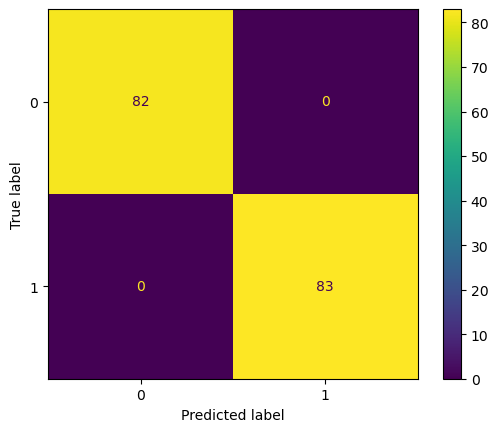

In [300]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0','1'])
disp.plot(values_format='')
plt.show()

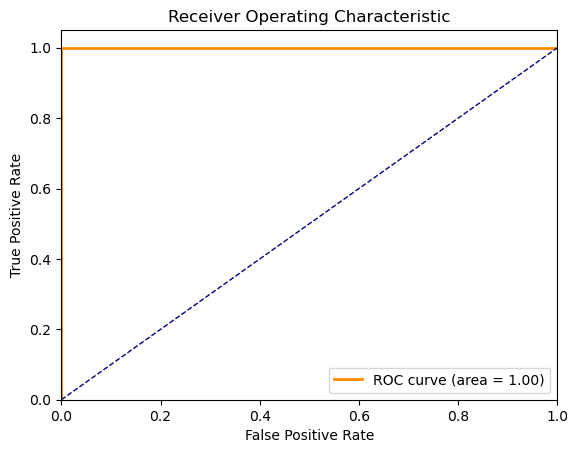

In [301]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(estimator, X_test, y_test):
    probas_ = estimator.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
plot_roc_curve(lr_model, X_test, y_test)


### certainly model is overfitting data hence we are getting 100% accuracy and 0 FP and 0 FN. This is due to limited size of dataset. ML models can predict better on huge dataset. We need more data to check and improve model performance

In [ ]:
#Another attempt to execute ML Model by re evaluating encoding categorical variables 

""" 
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import pickle
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Drop unnecessary columns from input data
X1 = df_new.drop(columns=['DateTime', 'MerchantCountry', 'Currency', 'Date_new', 'Time_new', 'day_name'])
y1 = df_new['FraudORGenuine_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

# Data preprocessing - OneHotEncoder to convert categorical to numeric values
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # Use handle_unknown='ignore'

# Fit the encoder on the training data and transform both training and testing data
encoded_train = encoder.fit_transform(X_train[['Merchant', 'IPcountry', 'IP_new']])
encoded_test = encoder.transform(X_test[['Merchant', 'IPcountry', 'IP_new']])

# Create DataFrame from the encoded data
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['Merchant', 'IPcountry', 'IP_new']), index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['Merchant', 'IPcountry', 'IP_new']), index=X_test.index)

# Drop original categorical columns from X_train and X_test
X_train = X_train.drop(columns=['Merchant', 'IPcountry', 'IP_new'])
X_test = X_test.drop(columns=['Merchant', 'IPcountry', 'IP_new'])

# Concatenate the encoded columns back to X_train and X_test
X_train = pd.concat([X_train, encoded_train_df], axis=1)
X_test = pd.concat([X_test, encoded_test_df], axis=1)

# Verify the data
print(X_train.head())
print(X_test.head())

# Fit the model
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

# Evaluate the model
print(f"Model Score: {lr.score(X_test, y_test)}")
y_pred = lr_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()


"""